In [1]:
import pandas as pd
import numpy as np
import glob, os
from utils import *
from augment import *
import seaborn as sns
import matplotlib.pyplot as plt
import cPickle

sns.set_style("whitegrid")

%matplotlib inline

label_numbers =  {"Button":0, "Icon":1, "Image":2, "Input field":3, "Line":4, "Text":5, "Navigation Menu":6}
number_label = {0:"Button", 1:"Icon", 2:"Image", 3:"Input field", 4:"Line", 5:"Text", 6: "Navigation Menu"}

In [2]:
#df = read_txts_and_combine() #uncomment if you want to reread all .txt logs into one .csv
df = pd.read_csv("../img_labeled/logs/log_all.csv")
df.head()

,id,x_abs,y_abs,x_rel,y_rel,width,height,label,filename
0,0,233,517,0.21181818181818182,0.7230769230769231,94,41,Image,04
1,1,359,522,0.32636363636363636,0.73006993006993,362,32,Navigation Menu,04
2,2,748,520,0.68,0.7272727272727273,23,31,Icon,04
3,3,776,524,0.7054545454545454,0.7328671328671329,15,26,Icon,04
4,4,796,525,0.7236363636363636,0.7342657342657343,18,25,Icon,04


In [3]:
print "Number of labeled webpages: %i"%(len(df.groupby("filename")))
print "Number of labels: %i"%(len(df))

Number of labeled webpages: 103
Number of labels: 1809


In [4]:
print "Number of labels per category:"
print df.groupby("label").count().id

Number of labels per category:
label
Button             190
Form                70
Icon               273
Image              259
Input field        164
Line               111
List                95
Navigation Menu    119
Rating bar           1
Slider              12
Text               465
Video               18
label               32
Name: id, dtype: int64


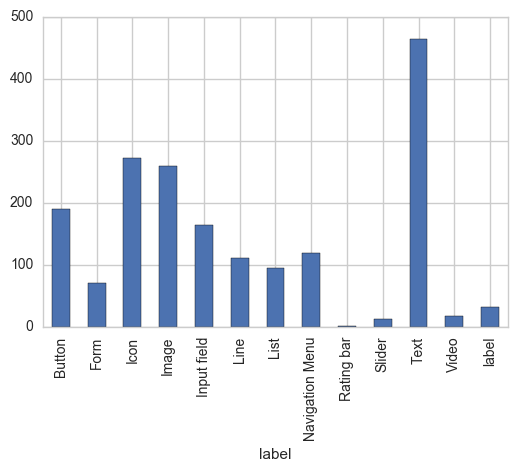

In [5]:
df.groupby("label").count().id.plot(kind="bar")#, color=sns.color_palette()[0])

In [6]:
#only take the labels for which we have at least 100 entries
df = filter_top_100(df)
print("%i labels left"%len(df))

1581 labels left


C:\Users\feita1\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [12]:
pickle_images("../img_labeled/logs/", df, 32)
pickle_images("../img_labeled/logs/", df, 64)
pickle_images("../img_labeled/logs/", df, 128)

In [13]:
path = "data_128.pkl"
x_train, y_train, x_test, y_test = load_pickle(path)

(<matplotlib.figure.Figure at 0x10e1feb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1617b0b8>)

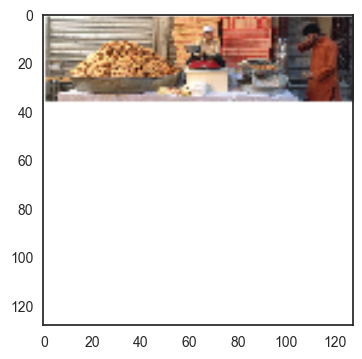

In [20]:
img = x_train[60]
plot_image(img)